In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt

import pandas as pd

project_root = Path.cwd().resolve().parent  # parent of notebooks/
sys.path.append(str(project_root))

from src.event_impact_modeling import EventImpactModeler
from src.forecasting import FinancialInclusionForecaster

In [2]:
model = EventImpactModeler(
    data_path="../data/processed/ethiopia_fi_enriched_data.csv",
    impact_links_path="../data/processed/ethiopia_fi_impact_links.csv",
    ramp_months=6
)

print("Unique indicators in dataset:", model.obs["indicator_code"].unique())


2026-02-03 11:19:32,306 | INFO | Loaded 14 events, 32 observations, 5 impact links


Unique indicators in dataset: ['ACC_OWNERSHIP' 'ACC_MM_ACCOUNT' 'ACC_4G_COV' 'ACC_MOBILE_PEN'
 'ACC_FAYDA' 'USG_P2P_COUNT' 'USG_P2P_VALUE' 'USG_ATM_COUNT'
 'USG_ATM_VALUE' 'USG_CROSSOVER' 'USG_TELEBIRR_USERS' 'USG_TELEBIRR_VALUE'
 'USG_MPESA_USERS' 'USG_MPESA_ACTIVE' 'USG_ACTIVE_RATE' 'AFF_DATA_INCOME'
 'GEN_GAP_ACC' 'GEN_MM_SHARE' 'GEN_GAP_MOBILE' 'ACC_SMARTPHONE'
 'USG_INTERNET']


In [3]:
indicator_mapping = {
    "ACC_ACCOUNT_OWNERSHIP": "ACC_OWNERSHIP",
    "USG_DIGITAL_PAYMENT": "USG_TELEBIRR_USERS",
    "USG_P2P_VALUE": "USG_P2P_VALUE",
    "USG_ATM_VALUE": "USG_ATM_VALUE",
}


In [4]:
forecaster = FinancialInclusionForecaster(model=model, forecast_horizon=36)


In [5]:
forecasts = {}
for requested_code, actual_code in indicator_mapping.items():
    print(f"\nForecasting {requested_code} (mapped to {actual_code})...")
    scenario_dfs = forecaster.scenario_forecast(actual_code)
    if scenario_dfs:
        forecasts[requested_code] = scenario_dfs
        print(f"Forecast generated for {requested_code}.")
    else:
        print(f"No forecast could be generated for {requested_code}.")


2026-02-03 11:19:32,355 | INFO | Fitted trend for ACC_OWNERSHIP using 6 observations.
2026-02-03 11:19:32,365 | INFO | Fitted trend for USG_TELEBIRR_USERS using 1 observations.
2026-02-03 11:19:32,371 | INFO | Fitted trend for USG_P2P_VALUE using 1 observations.
2026-02-03 11:19:32,378 | INFO | Fitted trend for USG_ATM_VALUE using 1 observations.



Forecasting ACC_ACCOUNT_OWNERSHIP (mapped to ACC_OWNERSHIP)...
Forecast generated for ACC_ACCOUNT_OWNERSHIP.

Forecasting USG_DIGITAL_PAYMENT (mapped to USG_TELEBIRR_USERS)...
Forecast generated for USG_DIGITAL_PAYMENT.

Forecasting USG_P2P_VALUE (mapped to USG_P2P_VALUE)...
Forecast generated for USG_P2P_VALUE.

Forecasting USG_ATM_VALUE (mapped to USG_ATM_VALUE)...
Forecast generated for USG_ATM_VALUE.



Plotting forecast for ACC_ACCOUNT_OWNERSHIP...


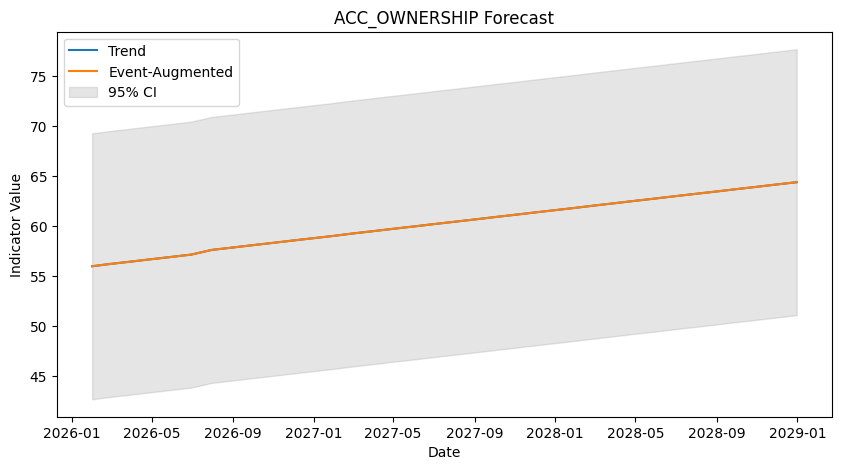


Plotting forecast for USG_DIGITAL_PAYMENT...


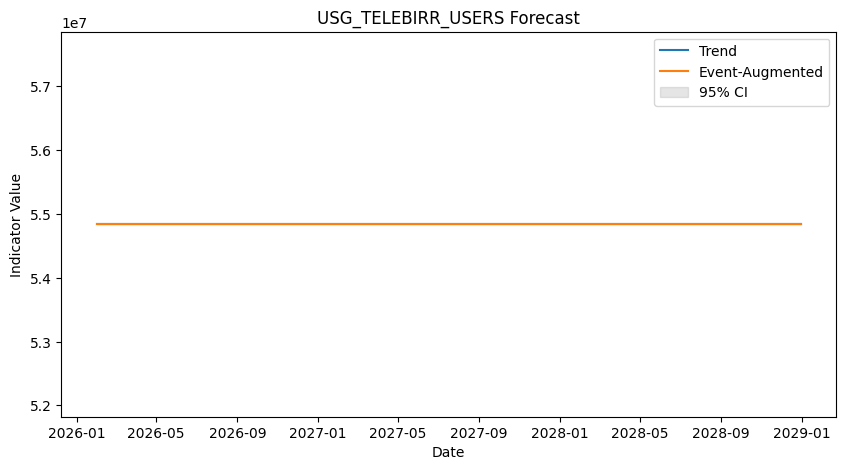


Plotting forecast for USG_P2P_VALUE...


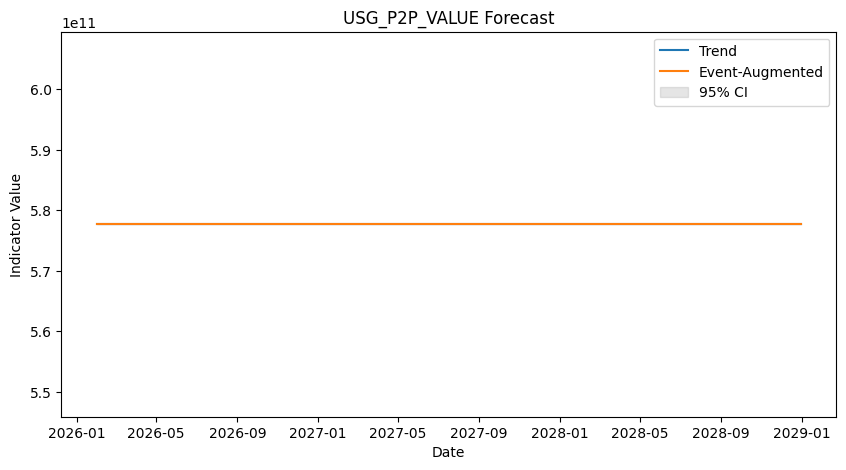


Plotting forecast for USG_ATM_VALUE...


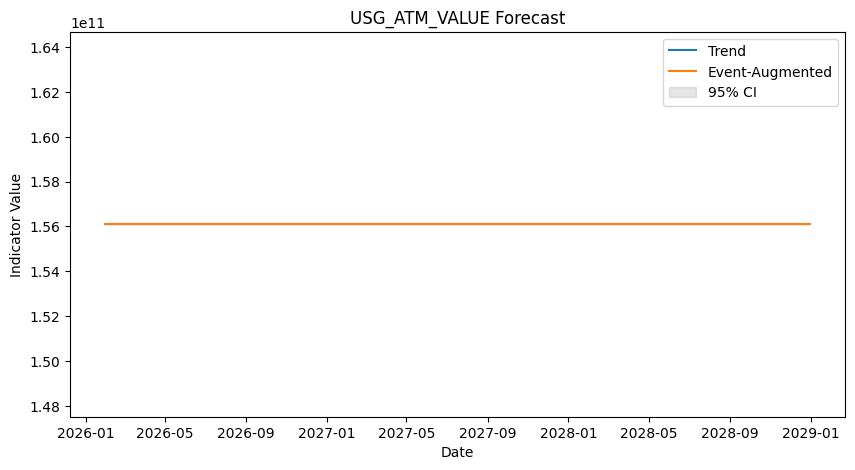

In [6]:
for requested_code, actual_code in indicator_mapping.items():
    print(f"\nPlotting forecast for {requested_code}...")
    forecaster.plot_forecast(actual_code)

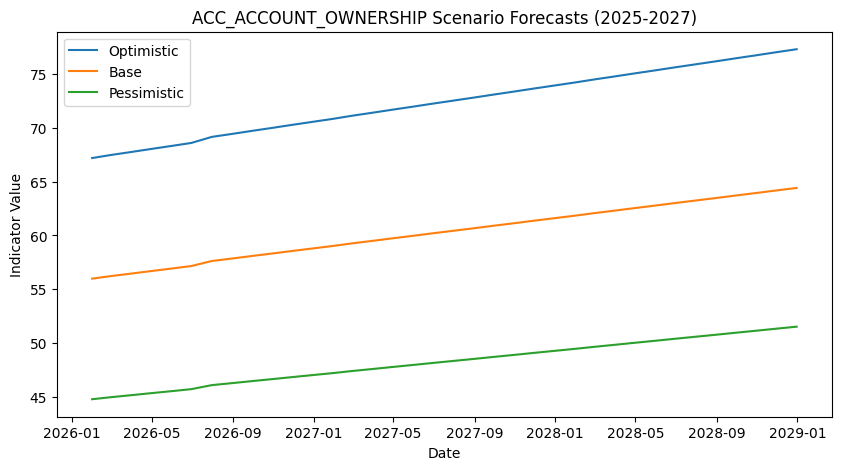

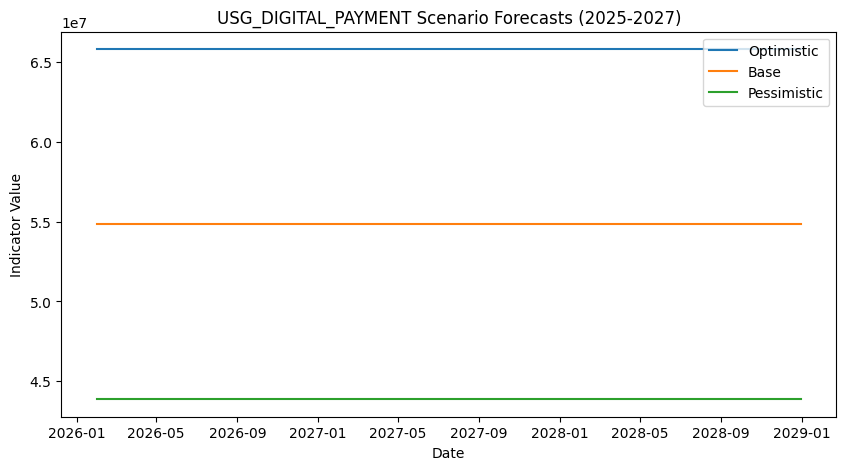

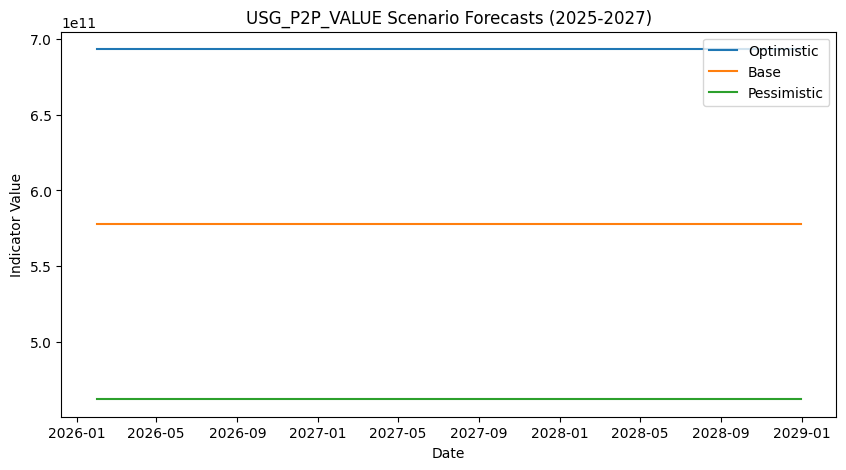

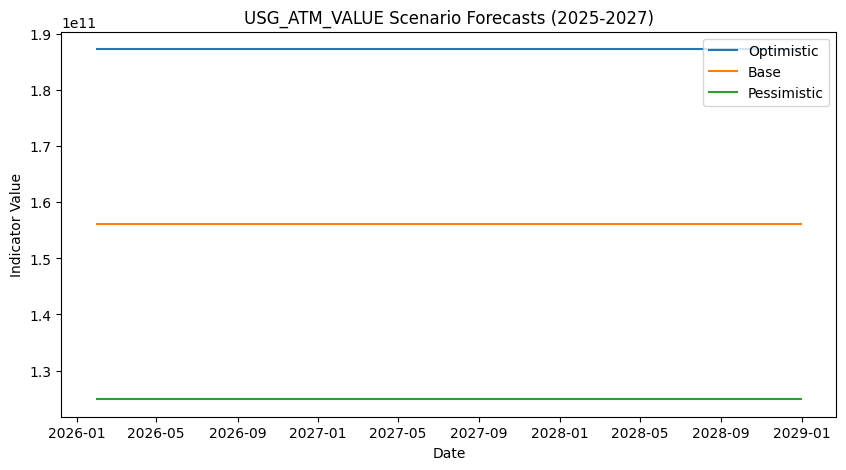

In [7]:
for requested_code in forecasts.keys():
    plt.figure(figsize=(10,5))
    for scenario, df in forecasts[requested_code].items():
        plt.plot(df.index, df["forecast"], label=scenario.capitalize())
    plt.title(f"{requested_code} Scenario Forecasts (2025-2027)")
    plt.xlabel("Date")
    plt.ylabel("Indicator Value")
    plt.legend()
    plt.show()


In [8]:
for requested_code, actual_code in indicator_mapping.items():
    print(f"\nEvent impact summary for {requested_code}:")
    event_impacts = forecaster.summarize_event_impacts(actual_code)
    display(event_impacts)



Event impact summary for ACC_ACCOUNT_OWNERSHIP:


""



Event impact summary for USG_DIGITAL_PAYMENT:


""



Event impact summary for USG_P2P_VALUE:


""



Event impact summary for USG_ATM_VALUE:


""


In [9]:
ratios = {}

for scenario in ["optimistic", "base", "pessimistic"]:
    p2p_df = forecasts["USG_P2P_VALUE"][scenario]
    atm_df = forecasts["USG_ATM_VALUE"][scenario]

    ratio_df = pd.DataFrame(index=p2p_df.index)
    ratio_df["P2P_ATM_Ratio"] = p2p_df["forecast"] / atm_df["forecast"]

    ratios[scenario] = ratio_df


In [10]:
output_dir = project_root / "models" / "forecasts"
output_dir.mkdir(parents=True, exist_ok=True)

for scenario, df in ratios.items():
    df.to_csv(output_dir / f"P2P_ATM_Ratio_{scenario}.csv")


In [11]:
output_dir = project_root / "models" /" forecasts"
forecaster.save_forecast_artifacts(output_dir)
print(f"Forecasts and models saved to {output_dir}")

2026-02-03 11:19:33,412 | INFO | Saved forecast artifacts to C:\Users\amare\Documents\KAIM\week-10\ethiopia-fi-forecast\models\ forecasts


Forecasts and models saved to C:\Users\amare\Documents\KAIM\week-10\ethiopia-fi-forecast\models\ forecasts


# Forecast Uncertainty & Strategic Outlook (2025–2027)

This section translates forecast outputs into a clear assessment of **risk, leverage, and strategic focus** over the medium term. It distinguishes between indicators that are structurally stable and those where policy and market action can materially shift outcomes.

---

## 1. Uncertainty Profile & Risk Assessment

The forecasts show a clear divide between **stable usage behaviors** and **volatile adoption dynamics**:

* **Low Uncertainty – Usage & Transaction Activity**
  Indicators such as **ATM usage**, **peer-to-peer transfers**, and **digital payment activity** display largely flat trajectories with very limited variance over time. These behaviors appear to function as system utilities: once established, they persist with minimal organic change.
  Differences across outcomes are driven primarily by **scenario assumptions**, not by underlying volatility.

* **High Uncertainty – Financial Access & Adoption**
  **Account ownership** stands out as the most uncertain indicator. Forecast dispersion widens over time, signaling high sensitivity to policy choices, delivery models, affordability, trust, and external conditions.
  This is the dimension where **intervention can meaningfully alter the national trajectory**.

**Key Insight:** Usage patterns are predictable; inclusion outcomes are not. Strategic leverage is concentrated in access expansion rather than transaction stability.

---

## 2. Business Interpretation by Key Indicator

### **Account Ownership**

* **Forecast Direction:** Sustained upward momentum in the central scenario.
* **Risk Profile:** Wide divergence between favorable and unfavorable futures.

**Strategic Interpretation:**
Account ownership is the system’s **primary growth lever**. Outcomes are highly contingent on deliberate action. Targeted interventions—simplified onboarding, agent network effectiveness, consumer trust, and affordability—can shift the system toward broad inclusion. Inaction risks entrenching stalled adoption.

---

### **Peer-to-Peer Transfers**

* **Forecast Direction:** High-volume stability with limited organic growth.
* **Risk Profile:** Low volatility, high dependence on structural assumptions.

**Strategic Interpretation:**
Peer-to-peer transfers are a **mature behavior**. Future value creation will not come from natural adoption but from **increasing transaction relevance**—embedding transfers into commerce, services, and higher-value use cases. Growth here must be engineered.

---

### **ATM Usage**

* **Forecast Direction:** Flat and persistent across scenarios.
* **Risk Profile:** Very low uncertainty.

**Strategic Interpretation:**
ATM infrastructure functions as a **baseline liquidity service**, not a growth driver. The strategic focus should be on reliability, efficiency, and cost control rather than network expansion.

---

### **Digital Payments & Mobile Money Users**

* **Forecast Direction:** Plateauing participation.
* **Risk Profile:** Low statistical uncertainty, high strategic implication.

**Strategic Interpretation:**
The market has likely moved beyond the rapid acquisition phase. Future impact and revenue will depend on **deepening usage**—higher frequency, broader use cases, and sustained engagement—rather than expanding the user base alone.

---

## 3. Strategic Snapshot

| Indicator             | Outlook         | Risk Level | Strategic Focus                  |
| --------------------- | --------------- | ---------- | -------------------------------- |
| **Account Ownership** | Growth-oriented | **High**   | Policy action, onboarding, trust |
| **P2P Transfers**     | Stable          | Low        | High-value use cases             |
| **ATM Usage**         | Stable          | Very Low   | Operational efficiency           |
| **Digital Payments**  | Stable          | Low        | Retention & engagement           |

---

## Executive Takeaway

Over the forecast horizon, the financial ecosystem appears **operationally mature but inclusively incomplete**.

* Transaction channels are stable and predictable.
* Access and adoption remain the decisive variables.

Strategic success depends on **prioritizing inclusion and engagement**, not expanding infrastructure or expecting organic growth from established behaviors.

---

